
===== SHAPE =====
(16719, 16)

===== INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float6

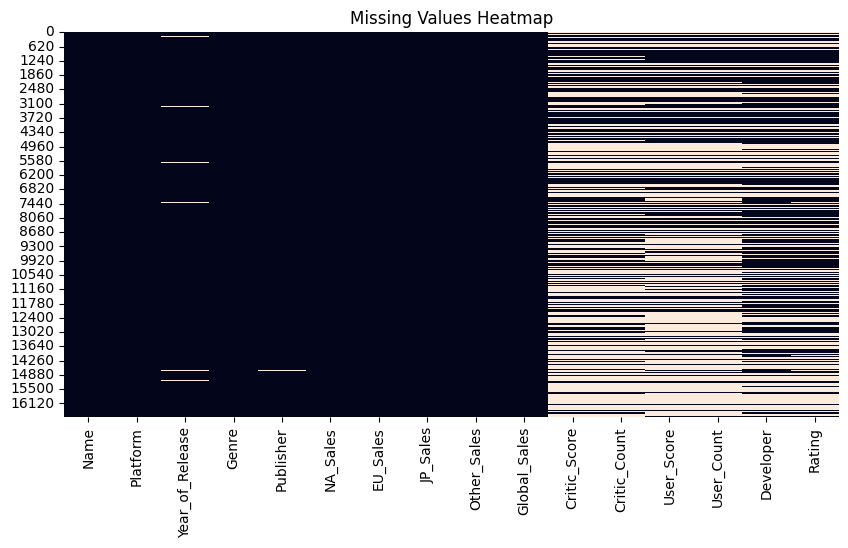


===== CORRELAZIONI VENDITE =====
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.765336  0.449598     0.638654      0.941010
EU_Sales      0.765336  1.000000  0.435068     0.722796      0.901239
JP_Sales      0.449598  0.435068  1.000000     0.291096      0.612300
Other_Sales   0.638654  0.722796  0.291096     1.000000      0.749242
Global_Sales  0.941010  0.901239  0.612300     0.749242      1.000000


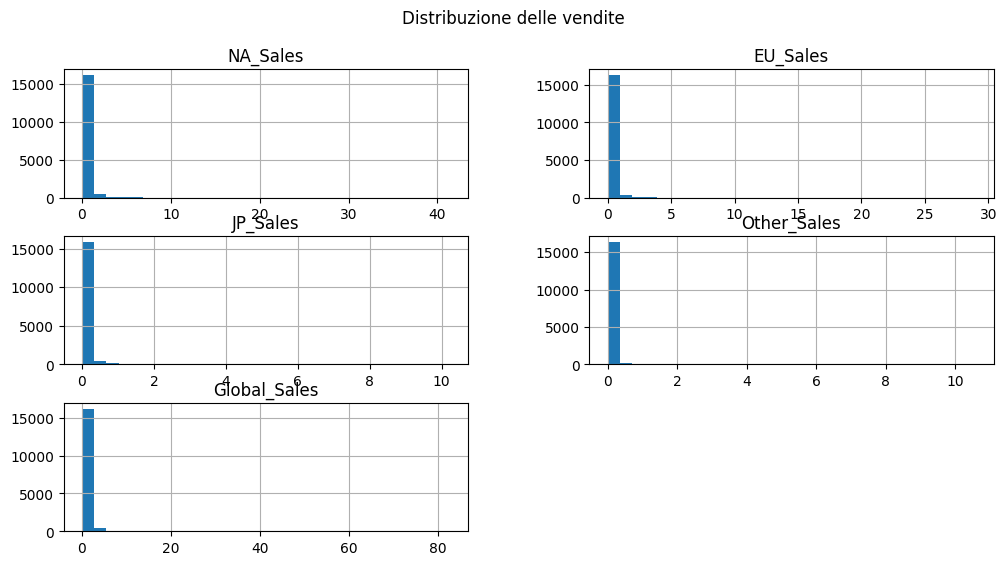

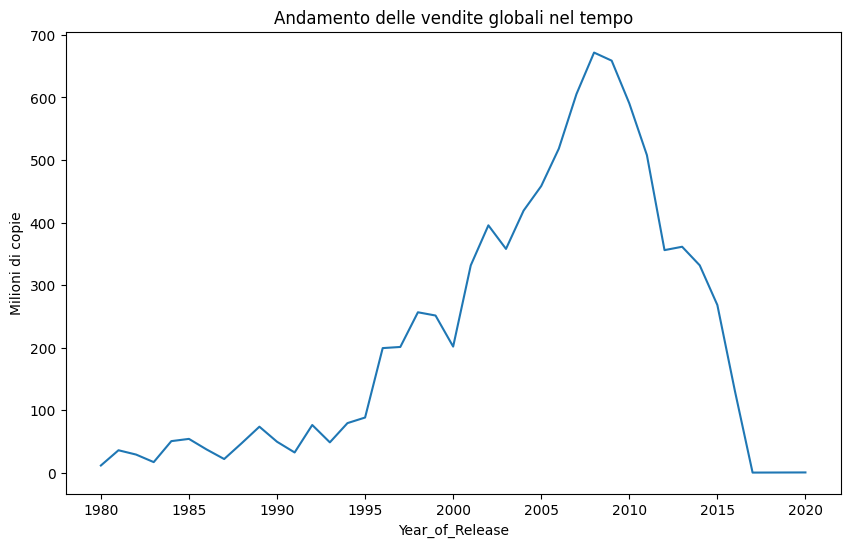


===== TOP PIATTAFORME PER NUMERO DI GIOCHI =====
Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: count, dtype: int64


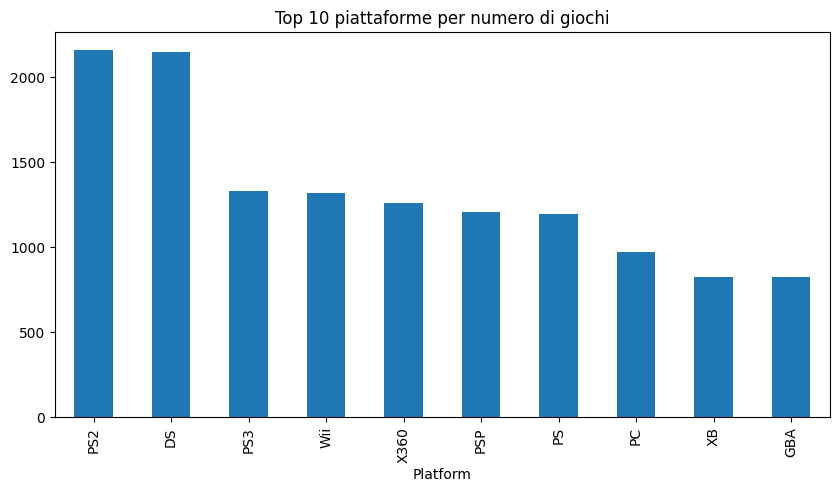

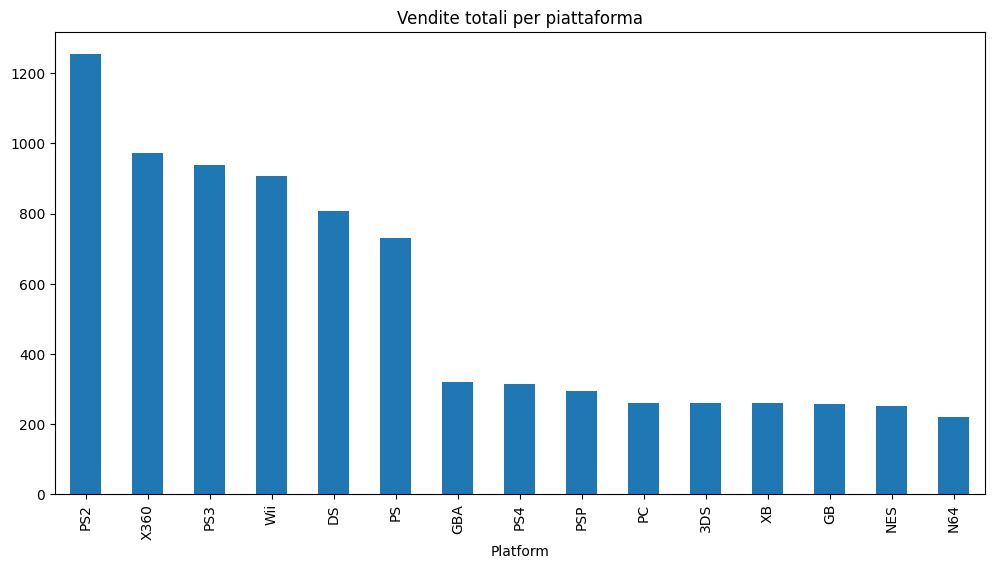

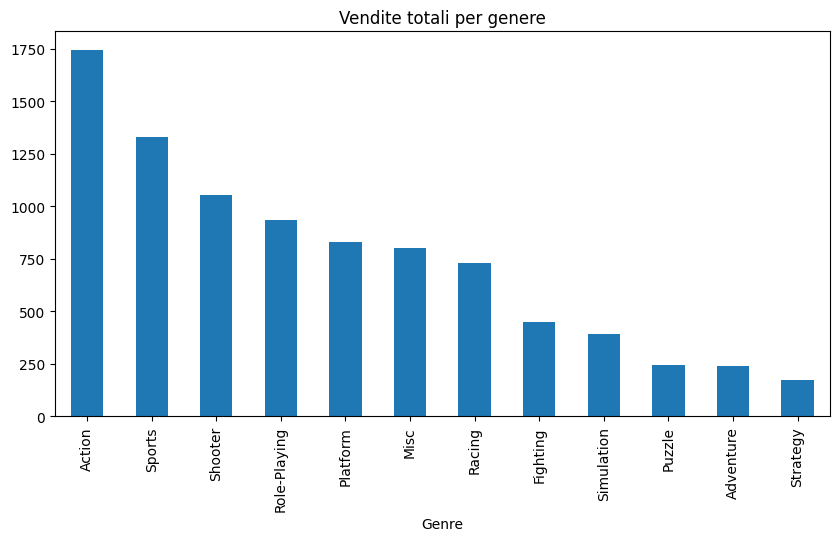

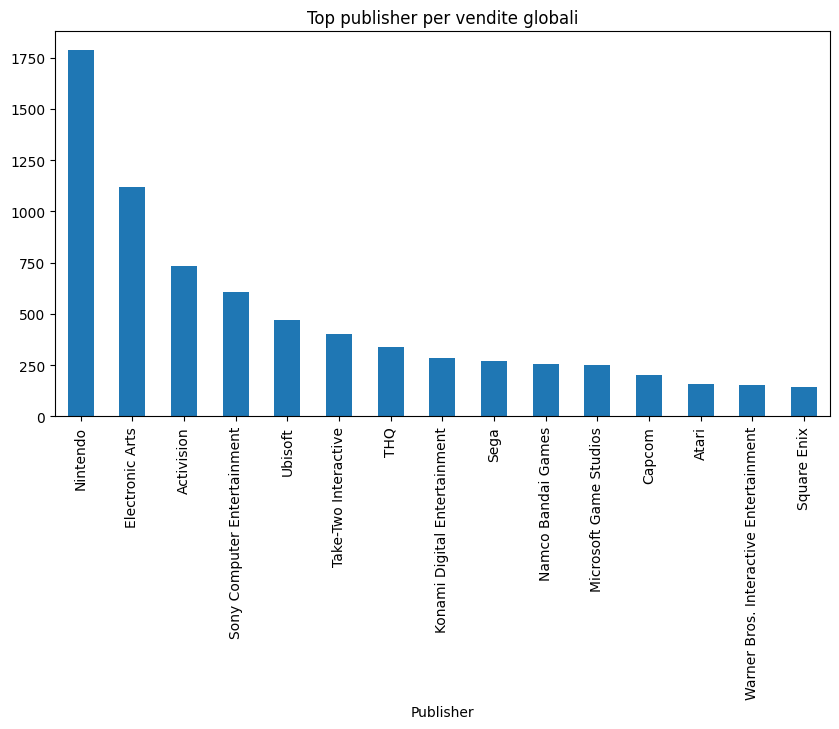


===== CORRELAZIONI RECENSIONI-VENDITE =====
              Critic_Score  User_Score  Global_Sales
Critic_Score      1.000000    0.580878      0.245471
User_Score        0.580878    1.000000      0.088139
Global_Sales      0.245471    0.088139      1.000000


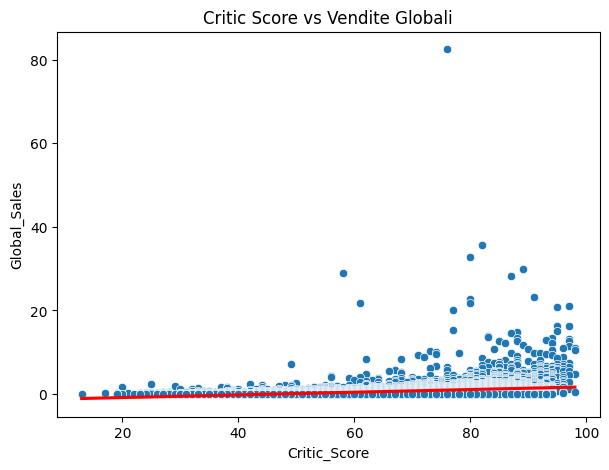

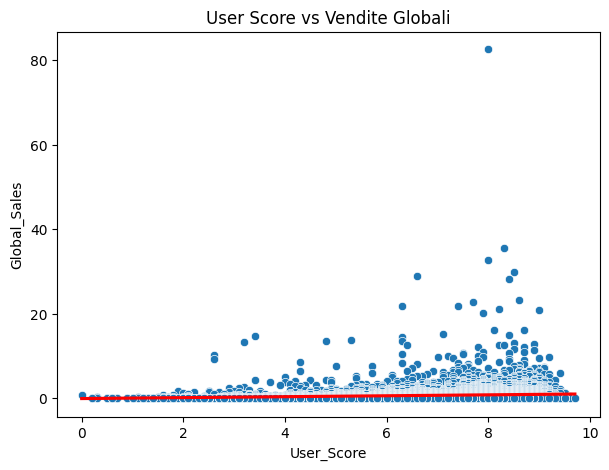

ValueError: could not convert string to float: 'Wii Sports'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# ============================
# 📊 EDA COMPLETO VENDITE VIDEOGIOCHI
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------
# 1. Caricamento dataset
# --------------------------------------
df = pd.read_csv("vgsales_clean.csv")

df["User_Score"] = pd.to_numeric(df["User_Score"], errors="coerce")

# --------------------------------------
# 2. Panoramica iniziale
# --------------------------------------
print("\n===== SHAPE =====")
print(df.shape)

print("\n===== INFO =====")
print(df.info())

print("\n===== DESCRIZIONE NUMERICA =====")
print(df.describe())

print("\n===== PRIMI 5 RECORD =====")
print(df.head())

# --------------------------------------
# 3. Missing Values
# --------------------------------------
print("\n===== MISSING VALUES =====")
print(df.isnull().mean().sort_values(ascending=False) * 100)

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# --------------------------------------
# 4. Vendite globali e regionali
# --------------------------------------
sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

print("\n===== CORRELAZIONI VENDITE =====")
print(df[sales_cols].corr())

df[sales_cols].hist(figsize=(12,6), bins=30)
plt.suptitle("Distribuzione delle vendite")
plt.show()

# Trend nel tempo
plt.figure(figsize=(10,6))
df.groupby("Year_of_Release")["Global_Sales"].sum().plot()
plt.title("Andamento delle vendite globali nel tempo")
plt.ylabel("Milioni di copie")
plt.show()

# --------------------------------------
# 5. Analisi piattaforme
# --------------------------------------
top_platforms = df["Platform"].value_counts().head(10)
print("\n===== TOP PIATTAFORME PER NUMERO DI GIOCHI =====")
print(top_platforms)

plt.figure(figsize=(10,5))
top_platforms.plot(kind="bar")
plt.title("Top 10 piattaforme per numero di giochi")
plt.show()

# Vendite per piattaforma
plt.figure(figsize=(12,6))
df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Vendite totali per piattaforma")
plt.show()

# --------------------------------------
# 6. Analisi generi
# --------------------------------------
top_genres = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
top_genres.plot(kind="bar")
plt.title("Vendite totali per genere")
plt.show()

# --------------------------------------
# 7. Analisi publisher
# --------------------------------------
top_publishers = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
top_publishers.plot(kind="bar")
plt.title("Top publisher per vendite globali")
plt.show()

# --------------------------------------
# 8. Recensioni: Critic vs User
# --------------------------------------

# Correlazioni recensioni-vendite
print("\n===== CORRELAZIONI RECENSIONI-VENDITE =====")
print(df[["Critic_Score", "User_Score", "Global_Sales"]].corr())

# Scatter Critic Score vs vendite
plt.figure(figsize=(7,5))
sns.scatterplot(x="Critic_Score", y="Global_Sales", data=df)
sns.regplot(x="Critic_Score", y="Global_Sales", data=df, scatter=False, color="red")
plt.title("Critic Score vs Vendite Globali")
plt.show()

# Scatter User Score vs vendite
plt.figure(figsize=(7,5))
sns.scatterplot(x="User_Score", y="Global_Sales", data=df)
sns.regplot(x="User_Score", y="Global_Sales", data=df, scatter=False, color="red")
plt.title("User Score vs Vendite Globali")
plt.show()

# --------------------------------------
# 9. Correlazioni complete
# --------------------------------------
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=False, cmap="viridis")
plt.title("Heatmap delle correlazioni")
plt.show()

# --------------------------------------
# 10. Analisi Rating ESRB
# --------------------------------------
plt.figure(figsize=(10,6))
df.groupby("Rating")["Global_Sales"].median().sort_values(ascending=False).plot(kind="bar")
plt.title("Vendite mediane per Rating ESRB")
plt.show()

# --------------------------------------
# 11. Feature Engineering e suggerimenti per ML
# --------------------------------------

print("\n===== CONSIGLI FEATURE ENGINEERING =====")

print("""
🎯 CREARE TARGET:
    HIT = 1 se Global_Sales >= 1.0 milione di copie, altrimenti 0.

📌 FEATURE UTILI (consigliate):
    - Platform (One Hot Encoding)
    - Genre (One Hot Encoding)
    - Publisher (solo primi 20 + 'Other')
    - Year_of_Release (numerica)
    - Critic_Score (forte correlazione con vendite)
    - User_Score (moderata correlazione)
    - Critic_Count
    - User_Count
    - Rating (One Hot Encoding)

⚠️ FEATURE DA ESCLUDERE:
    - Name (irrilevante)
    - Developer (troppi valori rari, poco utile)
    
📌 TRATTAMENTO MISSING:
    - Critic/User Score: imputare con media per genere + piattaforma
    - Rating: sostituire con categoria "Unknown"
    - Year_of_Release: togliere i pochi giochi senza anno

📌 OUTLIER:
    - Le vendite hanno una coda lunga → applicare log1p(Global_Sales) solo per analisi, NON per target.

📌 SUGGERIMENTO MODELLO:
    - Baseline: Random Forest / Gradient Boosting
    - Metriche: Accuracy + ROC AUC
    - Train/Test split per anno (split temporale)
""")

print("\nEDA COMPLETATO.")
